<Body>   
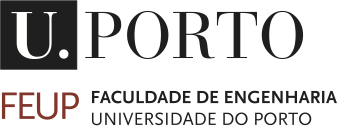   
<h1> <b>Machine Learning 2021/2022 (2<sup>nd</sup> semester) </b> </h1>
<p>Master in Electrical and Computer Engineering </p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt),
**Aníbal Matos** (anibal@fe.up.pt),
**Armando Sousa** (asousa@fe.up.pt),
**Andry Pinto** (amgp@fe.up.pt)

FEUP, Feb. 2022

---


# **Notebook #06: Classification (part 1)**


# Bayesian Classification

## Bayesian classification rule
Given a set of $\color{blue} M$ classes $\color{blue}\omega_i$, $i=1,\ldots,M$, and the posterior probabilities $\color{blue}{ P(\omega_i|x)}$:

$$\quad\text{Assign } x \text{ to } \omega_i =
\text{arg}\max_{\omega_j} P(\omega_j|x), \quad j=1,\ldots,M $$

Note that from Bayes' theorem,

$$ P(\omega_j|x) = \frac{p(x|\omega_j)P(\omega_j)}{p(x)},
\quad j=1,\ldots,M$$

the Bayesian classification rule becomes,

$$\quad\text{Assign } x \text{ to } \omega_i =
\text{arg}\max_{\omega_j} p(x|\omega_j)P(\omega_j), \quad j=1,\ldots,M $$

## Misclassification error 
Let $\mathcal{R}_i$ be the region where we decide for class $\omega_i$ $(i=1,\ldots,M)$. The probability of making a classification error is

$$ P_e = \sum_{i=1}^M P(\omega_i)\int_{U\setminus \mathcal{R}_i}p(x|\omega_i)dx$$

For the 2-class problem, this probability is 
$$ P_e = P(\omega_2)\int_{\mathcal{R}_1}p(x|\omega_2)dx +
 P(\omega_1)\int_{\mathcal{R}_2}p(x|\omega_1)dx $$

## Minimizing the expected risk
In some cases, misclassification errors mighty not equally significant. For such cases we can consider relative weights on the errors according to their significance and define an overall risk (or loss). The risk associated with class $\omega_k$ is defined as
$$ r_k = \sum_{i=1}^M \lambda_{ki}\int_{\mathcal{R}_i}p(x|\omega_k)dx$$
where $\lambda_{ki}$ is the relative weight associated with committing an error by assigning a pattern from class $\omega_k$ to class $\omega_i$. Note that $\lambda_{kk}=0$ (since it corresponds to correct decisions). 
The average risk is then
$$ r = \sum_{k=1}^M P(\omega_k)r_k = 
\sum_{i=1}^M\int_{\mathcal{R}_i}\left(\sum_{k=1}^M\lambda_{ki}P(\omega_k)p(x|\omega_k)\right)dx$$
The average risk is minimized if the space is partitioned by selecting $\mathcal{R}_i$ such the integrals in the above expression are minimized. Such is achieved by adopting the rule

$$\text{Assign }x\text{ to }\omega_i =\text{arg }\min_{\omega_j}
\sum_{k=1}^M \lambda_{kj}P(\omega_k)p(x|\omega_k),\quad j=1,\ldots,M$$

For the 2-class case, this reduces to

$$\text{Assign } x \text{ to } \omega_1 \text{ if: }
\lambda_{21}P(\omega_2)p(x|\omega_2) <
\lambda_{12}P(\omega_1)p(x|\omega_1)$$ 

$$\text{Assign } x \text{ to } \omega_2 \text{ if: }
\lambda_{12}P(\omega_1)p(x|\omega_1) <
\lambda_{21}P(\omega_2)p(x|\omega_2)$$ 

## Minimum distance classifier
Under the following assumptions:

i) Data follows a Gaussian distribution in each one of the classes;

ii) All classes are equiprobable; and

iii) Covariance is equal for all classes ($\Sigma$);


the Bayesian classification rule is equivalent to

$$\text{Assign }x\text{ to class }\omega_i: i=\text{arg }\min_{j} ||x-\mu_j||_{\Sigma^{-1}}^2,\quad j=1,\ldots,M$$

where $||z||_{\Sigma^{-1}} = \sqrt{z^T\Sigma^{-1}z}$ is the Mahalonis distance.

This means that classifying $x$ consists in selecting the class whose mean minimizes the **Mahalanobis distance** to $x$. When the (common) covariance has the form $\Sigma=\sigma^2I$ (all features share the same variance), this is equivalent to minimize the Euclidean distance.


### **Activity 1**

Consider a two-dimensional class problem with two classes ($\omega_1$ and $\omega_2$), characterized by Gaussian distributions with means $\mu_1=\left(1,0\right)^\top$ and $\mu_2=\left(2,1\right)^\top$, and covariances 
$\Sigma_1 = \Sigma_2 = \left[\begin{array}{cc} 1 & -1 \\ -1 & 2\end{array}\right]$, respectively. Assume the classes are equiprobable. 

**1.1** Obtain a dataset consisting from $100$ points from each class. Plot the data.


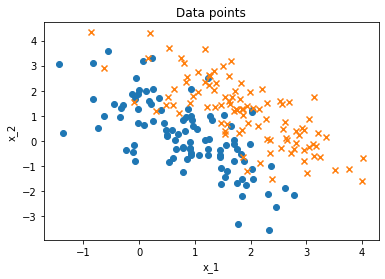

In [1]:
# Activity 1.1
import numpy as np 
import matplotlib.pyplot as plt


# multivariate gaussian distribution
def gaussian(x, mean, cov):
    n = mean.size
    d = x-mean
    np.reshape(d,[n,1])
    exp_term = -0.5 * np.transpose(d) @ np.linalg.inv(cov) @ d
    f_term = 1.0/(np.sqrt( (2*np.pi)**n * np.linalg.det(cov)))
    pdf = f_term * np.exp(exp_term)
    return pdf


# to make sure we have always the same data
np.random.seed(10)

# Distribution for class 1
mu_1 = np.array([1,0])
sigma_1 = np.array([[1,-1],[-1,2]])

# Distribution for class 2
mu_2 = np.array([2,1])
sigma_2 = np.array([[1,-1],[-1,2]])

# Sample from class distributions
size_1 = 100
size_2 = 100
X_1 =  np.random.multivariate_normal(mu_1, sigma_1, size=size_1)
X_2 =  np.random.multivariate_normal(mu_2, sigma_2, size=size_2)

# plot data points
plt.title('Data points')
plt.xlabel('x_1')
plt.ylabel('x_2')
# Class 1 (o)
plt.scatter(X_1[:,0], X_1[:,1], marker='o')
# Class 2 (x)
plt.scatter(X_2[:,0], X_2[:,1], marker='x')
plt.plot()
plt.show()



**1.2** Assign each point of the dataset to either $\omega_1$ or $\omega_2$, according to the Bayes decision rule. Estimate the classification probability error and plot the classification regions and the points.


Classification probability error: 0.125


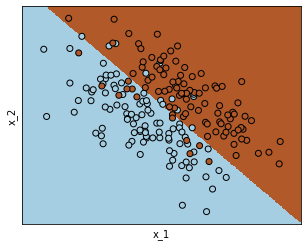

In [7]:
# Activity 1.2 (to be completed)

size_total = size_1+size_2
label_1 =   np.ones(size_1)
label_2 = 2*np.ones(size_2)

# put all data together
X = np.concatenate([X_1, X_2], axis=0)
label = np.concatenate([label_1, label_2], axis=0)

# A priori probabilities
# to be completed
P_class1 = size_1/size_total
P_class2 = size_2/size_total

# classify each data point (Bayesian classification)
classification = []
for i in range(size_total):
  # to be completed... (compute conditional probabilities)
  prob_1 = P_class1 *gaussian(X[i], mu_1, sigma_1)
  prob_2 = P_class2 *gaussian(X[i], mu_2, sigma_2)
  # to be completed (classify)
  if prob_2 < prob_1 :
    classification.append(1)
  else :
    classification.append(2)

# obtain classification probability error
Pe=0
for i in range(size_total) :
  # to be completed
  if classification[i] != label[i] :
     Pe = Pe + 1
Pe = Pe/size_total

print('Classification probability error:', Pe)


# plot classification regions and points

# generate a large number of points
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
X_plot = np.c_[xx.ravel(), yy.ravel()]

# classify all points from X_plot data
prediction = []
for i in range(X_plot.shape[0]):
  # to be completed... (compute conditional probabilities)
  prob_1 = P_class1 * gaussian(X_plot[i], mu_1, sigma_1)
  prob_2 = P_class2 * gaussian(X_plot[i], mu_2, sigma_2)
  # to be completed (classify)
  if prob_2 < prob_1 :
    prediction.append(1)
  else :
    prediction.append(2)

prediction = np.array(prediction)
prediction = prediction.reshape(xx.shape)


plt.figure(1, figsize=(5, 4))
plt.pcolormesh(xx, yy, prediction, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[:, 1], c=label, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('x_1')
plt.ylabel('x_2')
    
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
    
plt.show()

**1.3** Consider the loss matrix $L=\left[\begin{array}{cc} 0 & 1 \\ 0.05 & 0\end{array}\right]$. Assign each point of the dataset to $\omega_1$ or $\omega_2$ according to the average risk minimization rule. Plot the points with different colors, depending on the class they are assigned to. Estimate the average risk for this loss matrix.


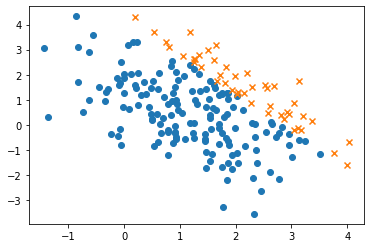

Average risk: 0.295


In [8]:
# Activity 1.3 (to be completed)

# loss matrix entries
L12 = 1
L21 = 0.05

# classifify each data point (average risk minimization)
class_risk = []
for i in range(size_total):
  # to be completed
  prob_1 = P_class1 * gaussian(X[i], mu_1, sigma_1)
  prob_2 = P_class2 * gaussian(X[i], mu_2, sigma_2)
  if prob_2*L21 < prob_1*L12 :
    class_risk.append(1)
  else :
    class_risk.append(2)

class_risk = np.array(class_risk)


plt.figure()
plt.scatter(X[np.where(class_risk==1),0], X[np.where(class_risk==1),1], marker='o')
plt.scatter(X[np.where(class_risk==2),0], X[np.where(class_risk==2),1], marker='x')
plt.plot()
plt.show()

# determine average risk
Ar = 0
for i in range(size_total) :
  if class_risk[i]!=label[i] :
    # to be completede
    if prob_2*L21 < prob_1*L12 : 
      Ar = Ar + L12
    else :
      Ar = Ar + L21

Ar = Ar/size_total
print('Average risk:', Ar)

**1.4** Using the same data, verify that in this case the Bayesian classification is in fact equivalent to the minimization of the Mahalanobis distance.

In [18]:
from numpy.core.multiarray import min_scalar_type
from numpy.ma.core import minimum
# Activity 1.4 (to be completed)

# classify each data point (Mahalanobis distance)
Sigma_inv = np.linalg.inv(sigma_1)
classification_dM = []
for i in range(size_total):
  diff1 = X[i]-mu_1
  diff1 = np.transpose([diff1])
  diff2 = X[i]-mu_2
  diff2 = np.transpose([diff2])
  # to be completed
  dM1_squared = np.transpose(diff1) @ Sigma_inv @ diff1
  dM2_squared = np.transpose(diff1) @ Sigma_inv @ diff2
  if dM2_squared > dM1_squared :
    classification_dM.append(1)
  else :
    classification_dM.append(2)

mclass = 0
if i in range(size_total) :
  if classification[i] != classification_dM[i] :
      print(i,' was not assigned to the same class')
      mclass += 1

if mclass == 0 : print('all points were classified in the same way')


all points were classified in the same way


# Naive Bayes classifier

The basic assumption now is that features (components of the feature vector) are statistically independent. This means  the joint distribution is the product of the marginal distributions of the features, that is

$$ p(x|\omega_i ) = \prod_{k=1}^l p(x_k|\omega_i), \quad i=1,\ldots,M$$

where we assuming there are $l$ features.

The classification rule is then

$$\quad\text{Assign } x \text{ to } \omega_i =
\text{arg}\max_{\omega_j} P(\omega_j)\prod_{k=1}^l p(x_k|\omega_j), \quad j=1,\ldots,M $$

## **Activity 2**

Consider a set of data with two features ($X_1$ and $X_2$) from a representative data set of points of two classes ($\omega_1$ and $\omega_2$). 








In [19]:
!wget -O dataset.csv.zip https://www.dropbox.com/s/evpwqery7uleqw1/data-set.csv.zip?dl=0 --quiet
!unzip dataset.csv.zip -d. 


Archive:  dataset.csv.zip
  inflating: ./data-set.csv          


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# multivariate gaussian distribution
def gaussian(x, mean, cov):
    n = mean.size
    d = x-mean
    np.reshape(d,[n,1])
    exp_term = -0.5 * np.transpose(d) @ np.linalg.inv(cov) @ d
    f_term = 1.0/(np.sqrt( (2*np.pi)**n * np.linalg.det(cov)))
    pdf = f_term * np.exp(exp_term)
    return pdf

# 1d normal distribution
def gaussian1d(x, mean, var):
    pdf = 1/np.sqrt(2*np.pi*var)*np.exp(-0.5*(x-mean)**2/var)
    return pdf

# read data from file
df = pd.read_csv('data-set.csv')
npoints = df.values.shape[0]

**2.1** Plot the data from the data set. Estimate the mean and covariance of the distributions within each class. Also estimate the probability of occurrence of each class.

Note that 
$$
\hat\mu_{ML} = \frac{1}{N}\sum_{n=1}^N x_n, \quad 
\hat\Sigma_{ML} = \frac{1}{N}\sum_{n=1}^N (x_n-\hat\mu_{ML})(x_n-\hat\mu_{ML})^\top
$$


In [21]:
# Activity 2.1 (to be completed)

# plot data
classData = df.values[:,2]
plt.figure()
plt.scatter(df.values[np.where(classData==1),0], df.values[np.where(classData==1),1], marker='o')
plt.scatter(df.values[np.where(classData==2),0], df.values[np.where(classData==2),1], marker='x')
plt.plot()
plt.show()


# estimate mean and probability of each class
sum_X_class1 = np.array([0,0])
sum_X_class2 = np.array([0,0])
num_class1 = 0
num_class2 = 0

# cycle through all points 
for i in range(npoints) :
  # to be completed 
  if df.values[i,2] == 1 :
    sum_X_class1 = sum_X_class1 + np.array([df.values[i]])
    num_class1 = num_class1 
  else :
    sum_X_class2 = sum_X_class2 + np.array([df.values[i]])
    num_class2 = num_class2

# compute probability
# to be completed
P_class1 =  gaussian()/npoints
P_class2 =  gaussian()/npoints

# compute mean
# to be completed
#mu_class1 = ...
#mu_class2 = ...

# display probablities and means
print('P1:',P_class1)
print('P2:',P_class2)
print('mu1:',mu_class1)
print('mu2:',mu_class2)

# estimate covariance of each class
sum_XXT_class1 = np.array([[0,0],[0,0]])
sum_XXT_class2 = np.array([[0,0],[0,0]])
for i in range(npoints) :
  # to be completed
  if df.values[i,2] == 1 :
    #sum_XXT_class1 = ...
  else :
    #sum_XXT_class2 = ...

# compute convariance
# to be completed
#sigma_class1 = ...
#sigma_class2 = ...

print('Sigma1:',sigma_class1)
print('Sigma2:',sigma_class2)

IndentationError: ignored

**2.2** Consider the set of points $\{(x_1,x_2): x_1,x_2\in\{-4,-3,-2,-1,0,1,2,3,4\}\}$ and classify each of them according the naive Bayesian rule.

In [22]:
# Activity 2.2 (to be completed)

# define grid of points to be classified 
x1, x2 = np.meshgrid(np.arange(-4,4), np.arange(-4, 4))
X_plot = np.c_[x1.ravel(), x2.ravel()]

sigma1_class1 = sigma_class1[0,0]
sigma2_class1 = sigma_class1[1,1]

sigma1_class2 = sigma_class2[0,0]
sigma2_class2 = sigma_class2[1,1]

# Naive Bayesian classifier
prediction_nb = []
for i in range(X_plot.shape[0]):
  # to be completed
  prob_1 = gaussian1d(X_plot[i,0], mu_class1[0], sigma1_class1[0,0]) * gaussian1d(X_plot[i,1], mu_class1[1], sigma1_class1[1,1])
  prob_2 = gaussian1d(X_plot[i,0], mu_class2[0], sigma1_class2[0,0]) * gaussian1d(X_plot[i,1], mu_class2[1], sigma1_class2[1,1])
  if prob_1 > prob_2 :
    prediction_nb.append(1)
  else :
    prediction_nb.append(2)

prediction_nb = np.array(prediction_nb)

# plot results
plt.figure()
plt.scatter(X_plot[np.where(prediction_nb==1),0], X_plot[np.where(prediction_nb==1),1], marker='o')
plt.scatter(X_plot[np.where(prediction_nb==2),0], X_plot[np.where(prediction_nb==2),1], marker='x')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.xlim(x1.min()-0.5, x1.max()+0.5)
plt.ylim(x2.min()-0.5, x2.max()+0.5)
plt.xticks(())
plt.yticks(())
plt.show()


NameError: ignored

**2.3** Repeat the above point, now using the Bayesian classifier rule.

In [ ]:
# Activity 2.3 (to be completed)

# Bayesian classifier
prediction = []
for i in range(X_plot.shape[0]):
  # to be completed
  #prob_1 = ...
  #prob_2 = ...
  #if ... :
  #  prediction.append(1)
  #else :
  #  prediction.append(2)

prediction = np.array(prediction)

plt.figure()
plt.scatter(X_plot[np.where(prediction==1),0], X_plot[np.where(prediction==1),1], marker='o')
plt.scatter(X_plot[np.where(prediction==2),0], X_plot[np.where(prediction==2),1], marker='x')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.xlim(x1.min()-0.5, x1.max()+0.5)
plt.ylim(x2.min()-0.5, x2.max()+0.5)
plt.xticks(())
plt.yticks(())
plt.show()